In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("trip.csv")  # 날짜 파싱은 생략

# 데이터 미리보기
print(df.head(5))



    passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
0     Pamela Duffy   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1  Michelle Foster   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2       Tina Combs   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3      Anthony Ray   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4  Brianna Johnson  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   

  payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
0     Debit Card                6           3.34         13.0        2.76   
1     Debit Card                1           1.80         16.0        4.00   
2     Debit Card                1           1.00          6.5        1.45   
3           Cash                1           3.70         20.5        6.39   
4     Debit Card                1           4.37         16.5        0.00   

   tolls_amount  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [25]:
# 결측치 개수
missing_counts = df.isnull().sum()
print("결측치 개수:\n", missing_counts)

# 결측치 비율 (%)
missing_ratio = df.isnull().sum() / len(df) * 100
print("결측치 비율 (%):\n", missing_ratio)

# fare_amount 결측치 제거
df.dropna(subset=['fare_amount'], inplace=True)



결측치 개수:
 passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64
결측치 비율 (%):
 passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013215
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64


In [26]:
# 결측치 제거 후 확인
print("\n 결측치 제거 후 각 열 결측치 수:\n", df.isnull().sum())



 결측치 제거 후 각 열 결측치 수:
 passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64


In [34]:
numeric_cols = df.select_dtypes(include=np.number).columns
print("숫자형 변수 목록:", list(numeric_cols))

숫자형 변수 목록: ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount']


In [33]:
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
mpl.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

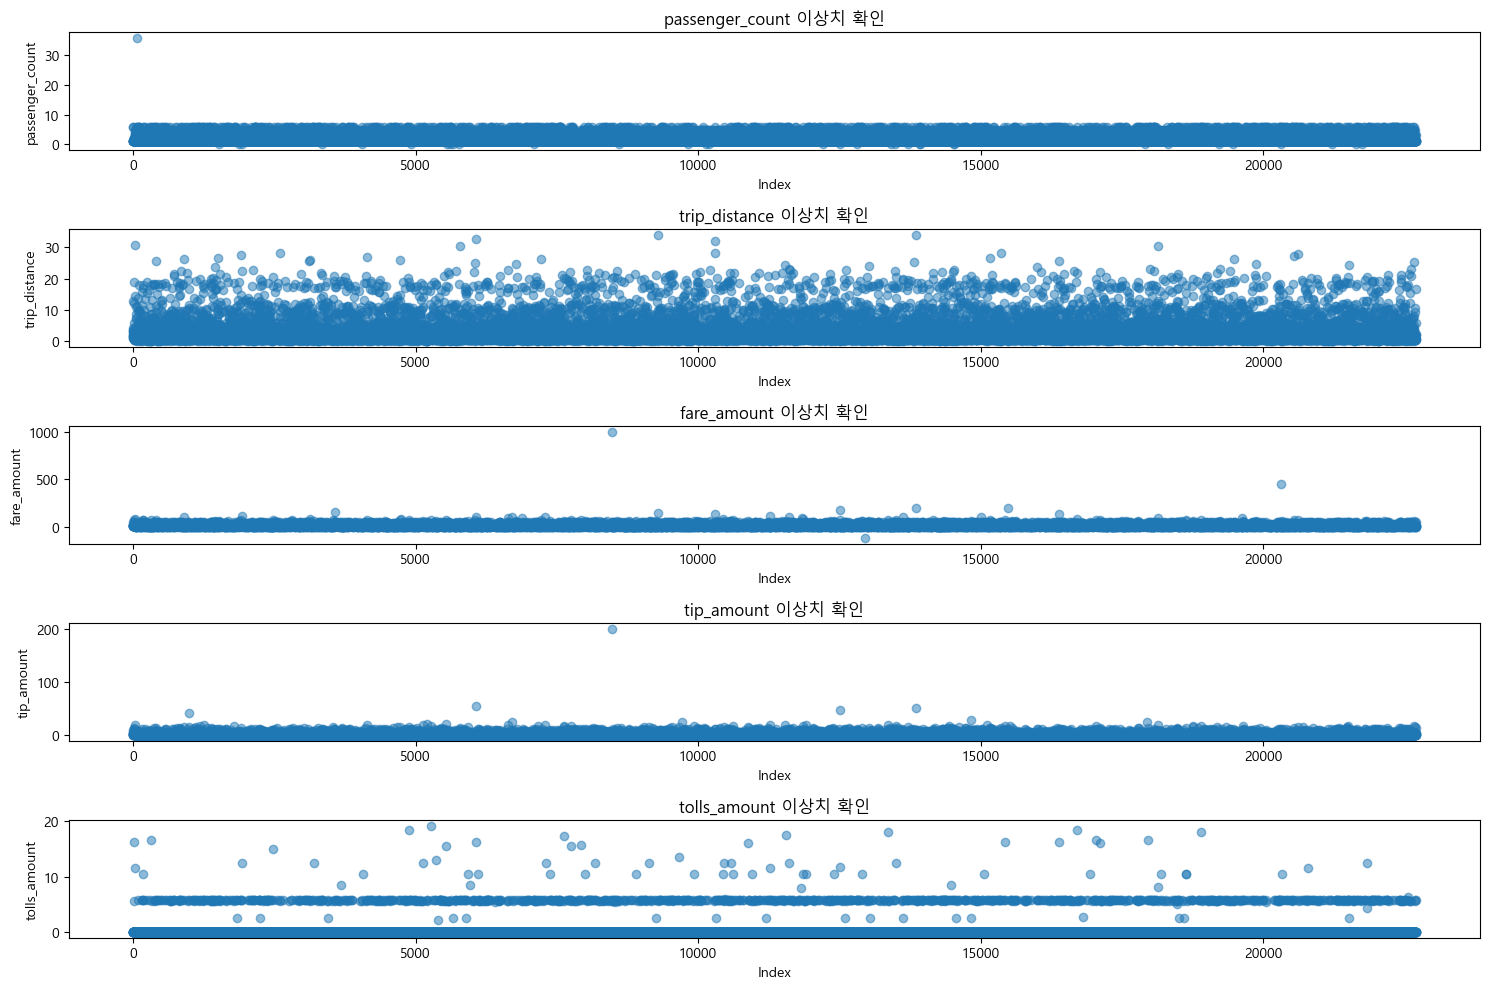

In [29]:
# 변수별 이상치 확인용 scatter plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    plt.scatter(df.index, df[col], alpha=0.5)
    plt.title(f"{col} 이상치 확인", fontsize=12)
    plt.xlabel("Index")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [30]:
# 예: 데이터프레임 df에 'fare_amount' 컬럼이 있다고 가정
Q1 = df['fare_amount'].quantile(0.25)   # 1사분위수
Q3 = df['fare_amount'].quantile(0.75)   # 3사분위수
IQR = Q3 - Q1                           # IQR 계산

# 이상치 기준 범위 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_iqr_filtered = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

# 결과 출력
print(f"제거 전 데이터 수: {len(df)}")
print(f"제거 후 데이터 수: {len(df_iqr_filtered)}")
print(f"제거된 이상치 수: {len(df) - len(df_iqr_filtered)}")

제거 전 데이터 수: 22698
제거 후 데이터 수: 20636
제거된 이상치 수: 2062


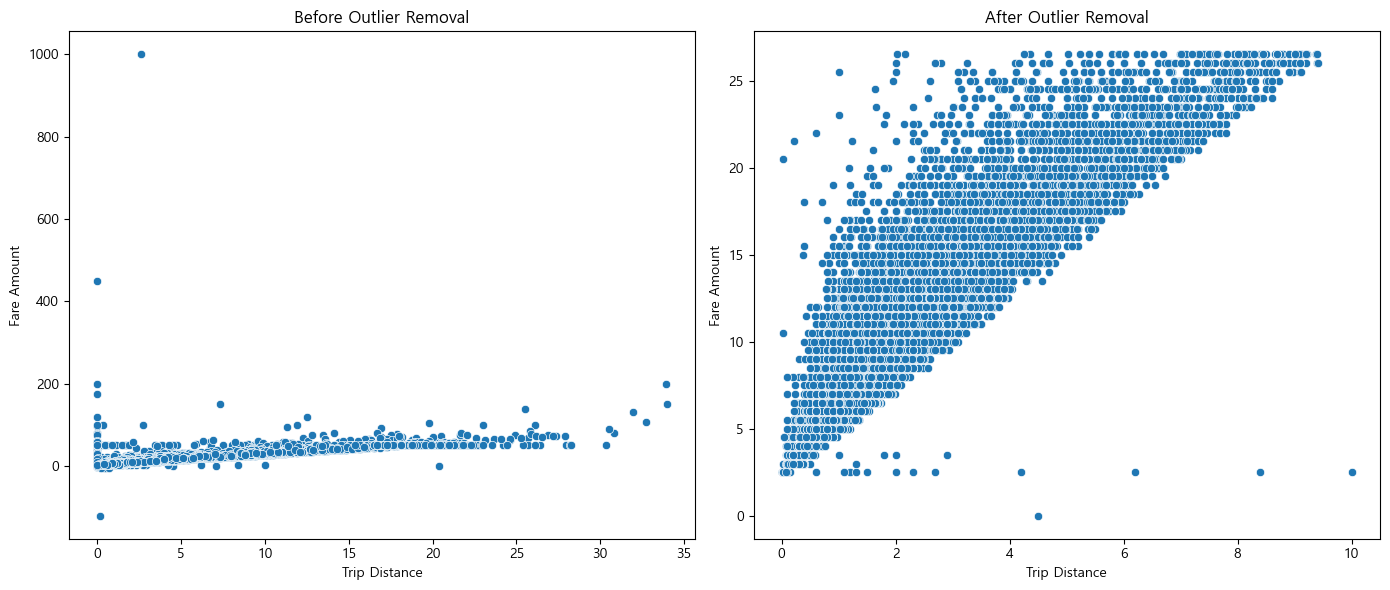

In [35]:
# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='trip_distance', y='fare_amount')
plt.title("Before Outlier Removal")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_iqr_filtered, x='trip_distance', y='fare_amount')
plt.title("After Outlier Removal")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")

plt.tight_layout()
plt.show()

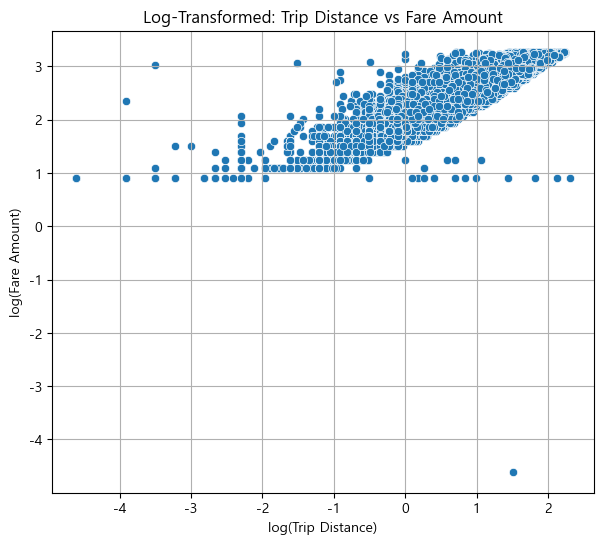

In [32]:
#로그를 적용하여 그래프 조정
# 로그 변환된 컬럼 추가 (0 이상만 대상)
df_iqr_filtered = df_iqr_filtered[(df_iqr_filtered['fare_amount'] > 0) & (df_iqr_filtered['trip_distance'] > 0)]
df_iqr_filtered['log_fare'] = np.log(df_iqr_filtered['fare_amount'])
df_iqr_filtered['log_distance'] = np.log(df_iqr_filtered['trip_distance'])

# 로그 스케일 산점도
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df_iqr_filtered, x='log_distance', y='log_fare')
plt.title("Log-Transformed: Trip Distance vs Fare Amount")
plt.xlabel("log(Trip Distance)")
plt.ylabel("log(Fare Amount)")
plt.grid(True)
plt.show()

In [ ]:
git config --global user.name "Jinwook Kim"
git config --global user.email "planetbb@gmail.com"


In [ ]:

echo "# taxi_fare_data" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/planetbb/taxi_fare_data.git
git push -u origin main